In [1]:
from sequential_process_v2 import *
import os
import cv2
import matplotlib.pyplot as plt

test = 'static/'
t_path = [os.path.join(test, i) for i in os.listdir(test)]
t_path

['static/0.jpg',
 'static/1.jpg',
 'static/12.jpg',
 'static/17.jpg',
 'static/2.jpg',
 'static/3.jpg',
 'static/4.jpg',
 'static/5.jpg',
 'static/6.jpg',
 'static/66.jpg',
 'static/7.jpg',
 'static/manual_ann.jpg',
 'static/None_ann.jpg',
 'static/output__ann.jpg']

In [2]:
image = cv2.imread(t_path[0])
image = cv2.resize(image, (256, 256))
leaf_mask = predict_mask(image)
bg_removed = remove_bg(image, leaf_mask)
seve_mask = predict_severity(bg_removed)
disease = classify(bg_removed)

overlay = overlay_images(bg_removed, seve_mask, name='manual')

## Sequential Process

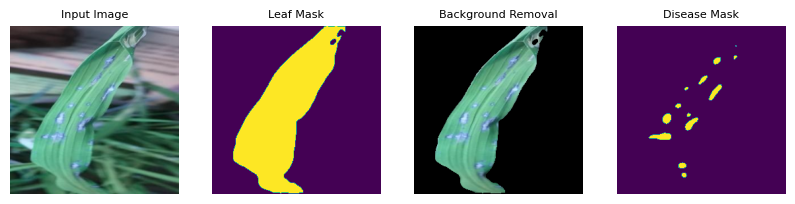

In [10]:
fig, ax = plt.subplots(1, 4, figsize=(10,8))
steps = ["Input Image", "Leaf Mask", "Background Removal", "Disease Mask"]

for idx, img, s in zip(range(5), [image, leaf_mask, bg_removed, seve_mask], steps):
    ax[idx].imshow(img)
    ax[idx].set_title(s, fontsize=8)
    ax[idx].axis('off')
plt.show()

## Final Output

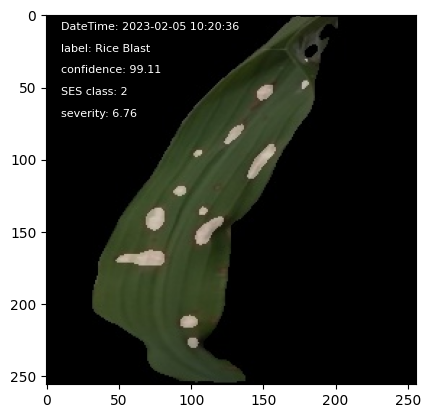

In [21]:
pred_dict, f_path = sequential_process(image)

plt.imshow(plt.imread(f_path))

i = 0
for k,v in pred_dict.items():
    plt.annotate(text=f"{k}: {v}", xy=(10, 10+i), color='white', fontsize=8)
    i += 15
    
plt.show()